In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('fraud_oracle.csv')

In [3]:
df.head(20)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,...,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,...,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils


In [4]:
df.shape

(15420, 33)

In [5]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [6]:
Numarical_Data = []
Categorical_Data = []

for features in df.columns:
    if df[features].dtypes == 'O':
        Categorical_Data.append(features)
    else:
        Numarical_Data.append(features)


In [7]:
print(Numarical_Data)
print()
print(Categorical_Data)

['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year']

['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']


In [8]:
for features in Numarical_Data:
    print(features)
    print(df[features].unique())
    print()

WeekOfMonth
[5 3 2 4 1]

WeekOfMonthClaimed
[1 4 2 3 5]

Age
[21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55
 35 44 72 29 37 59 49 50 26 48 64 33 74 23 25 56 16 68 18 51 22 53 46 43
 57 54 69 67 19 78 77 75 80 58 73 24 76 62 79 70 17 66]

FraudFound_P
[0 1]

PolicyNumber
[    1     2     3 ... 15418 15419 15420]

RepNumber
[12 15  7  4  3 14  1 13 11 16  6  2  8  5  9 10]

Deductible
[300 400 500 700]

DriverRating
[1 4 3 2]

Year
[1994 1995 1996]



In [9]:
df['Age'] = np.where(df['Age']== 0 ,df['Age'].mode(),df['Age'])

In [10]:
df.drop(['PolicyNumber'],axis=1,inplace=True)

In [11]:
for features in Categorical_Data:
    print(features)
    print(df[features].unique())
    print()

Month
['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']

DayOfWeek
['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']

Make
['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']

AccidentArea
['Urban' 'Rural']

DayOfWeekClaimed
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']

MonthClaimed
['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']

Sex
['Female' 'Male']

MaritalStatus
['Single' 'Married' 'Widow' 'Divorced']

Fault
['Policy Holder' 'Third Party']

PolicyType
['Sport - Liability' 'Sport - Collision' 'Sedan - Liability'
 'Utility - All Perils' 'Sedan - All Perils' 'Sedan - Collision'
 'Utility - Collision' 'Utility - Liability' 'Sport - All Perils']

VehicleCategory
['Sport' 'Utility' 'Sedan']

VehiclePrice
['more than 69000' '20000 to 29000' '30000 to 39000' 'less th

In [12]:
# Here we Create Dictionary For Month 

Month_Dictionary = {'Dec':12 ,'Jan':1 ,'Oct':10 ,'Jun':6 ,'Feb':2 ,'Nov':11 ,'Apr':4 ,'Mar':3 ,'Aug':8 ,'Jul':7 ,'May':5 ,'Sep':9}

In [13]:
df['Month'] = df['Month'].map(Month_Dictionary)

In [14]:
# here we Create Dictionary for Day

DayOfWeek_Dictionary = {'Wednesday':4 ,'Friday':6 ,'Saturday':7 ,'Monday':2 ,'Tuesday':3 ,'Sunday':1 ,'Thursday':5}

In [15]:
df['DayOfWeek'] = df['DayOfWeek'].map(DayOfWeek_Dictionary)

In [16]:
# Here we create the Dictionary for different Vahical Brands

Make_Dictionary = {'Honda':1 ,'Toyota':2 ,'Ford':3 ,'Mazda':4 ,'Chevrolet':5 ,'Pontiac':6 ,'Accura':7 ,'Dodge':8
, 'Mercury':9 ,'Jaguar':10 ,'Nisson':11 ,'VW':12 ,'Saab':13 ,'Saturn':14 ,'Porche':15 ,'BMW':16 ,'Mecedes':17
 ,'Ferrari':18 ,'Lexus':19}

In [17]:
df['Make'] = df['Make'].map(Make_Dictionary)

In [18]:
# Here we create the Dictionary for Accidental Area

AccidentArea_Dictionary = df['AccidentArea'].value_counts().to_dict()


In [19]:
df['AccidentArea'] = df['AccidentArea'].map(AccidentArea_Dictionary)

In [20]:
print(df[df['DayOfWeekClaimed']== '0'].index)

Int64Index([1516], dtype='int64')


In [21]:
df['DayOfWeekClaimed'].unique()

array(['Tuesday', 'Monday', 'Thursday', 'Friday', 'Wednesday', 'Saturday',
       'Sunday', '0'], dtype=object)

In [22]:
df.loc[1516,'DayOfWeekClaimed'] == df['DayOfWeekClaimed'].mode()

0    False
dtype: bool

In [23]:
df['DayOfWeekClaimed'] = df['DayOfWeekClaimed'].map(DayOfWeek_Dictionary)

In [24]:
df['DayOfWeekClaimed'].unique()

array([ 3.,  2.,  5.,  6.,  4.,  7.,  1., nan])

In [25]:
df['DayOfWeekClaimed'] = np.where(df['DayOfWeekClaimed'].isnull() , df['DayOfWeekClaimed'].mode(),df['DayOfWeekClaimed'])

In [26]:
df['DayOfWeekClaimed'].unique()

array([3., 2., 5., 6., 4., 7., 1.])

In [27]:
print(df[df['MonthClaimed']== '0'].index)

Int64Index([1516], dtype='int64')


In [28]:
df.loc[1516,'MonthClaimed'] == df['MonthClaimed'].mode()

0    False
dtype: bool

In [29]:
df['MonthClaimed'] = df['MonthClaimed'].map(Month_Dictionary)

In [30]:
df['MonthClaimed'] = np.where(df['MonthClaimed'].isnull() , df['MonthClaimed'].mode(),df['MonthClaimed'])

In [31]:
df['Sex'] = np.where(df['Sex'] == 'Male' , 1,0)

In [32]:
MaritalStatus_Dictionary = df['MaritalStatus'].value_counts().to_dict()

df['MaritalStatus'] = df['MaritalStatus'].map(MaritalStatus_Dictionary)

In [33]:
Fault_Dictionary = df['Fault'].value_counts().to_dict()
df['Fault'] = df['Fault'].map(Fault_Dictionary)

In [34]:
PolicyType_Dictionary = df['PolicyType'].value_counts().to_dict()

df['PolicyType'] = df['PolicyType'].map(PolicyType_Dictionary)

In [35]:
VehicleCategory_Dictionary = df['VehicleCategory'].value_counts().to_dict()

df['VehicleCategory'] = df['VehicleCategory'].map(VehicleCategory_Dictionary)

In [36]:
VehiclePrice_Dictionary = df['VehiclePrice'].value_counts().to_dict()

df['VehiclePrice'] = df['VehiclePrice'].map(VehiclePrice_Dictionary)

In [37]:
df['Days_Policy_Accident'] = np.where(df['Days_Policy_Accident'] == 'none', df['Days_Policy_Accident'].mode(),df['Days_Policy_Accident'])

df['Days_Policy_Accident'] = df['Days_Policy_Accident'].map(df['Days_Policy_Accident'].value_counts().to_dict())

In [38]:
df['Days_Policy_Claim'] = np.where(df['Days_Policy_Claim'] == 'none' , df['Days_Policy_Claim'].mode(),df['Days_Policy_Claim'])
df['Days_Policy_Claim'] = df['Days_Policy_Claim'].map(df['Days_Policy_Claim'].value_counts().to_dict())

In [39]:
df['PastNumberOfClaims'] = np.where(df['PastNumberOfClaims'] == 'none' , df['PastNumberOfClaims'].mode(),df['PastNumberOfClaims'])
df['PastNumberOfClaims'] = df['PastNumberOfClaims'].map(df['PastNumberOfClaims'].value_counts().to_dict())

In [40]:
df['AgeOfVehicle'] = df['AgeOfVehicle'].map(df['AgeOfVehicle'].value_counts().to_dict())

In [41]:
df['AgeOfPolicyHolder'] = df['AgeOfPolicyHolder'].map(df['AgeOfPolicyHolder'].value_counts().to_dict())

In [42]:
df['PoliceReportFiled'] = np.where(df['PoliceReportFiled']=='Yes' , 1 ,0)

In [43]:
df['WitnessPresent'] = np.where(df['WitnessPresent']=='Yes' , 1 ,0)

In [44]:
df['AgentType'] = df['AgentType'].map(df['AgentType'].value_counts().to_dict())

In [45]:
df['NumberOfSuppliments'] = np.where(df['NumberOfSuppliments'] == 'none' , df['NumberOfSuppliments'].mode(),df['NumberOfSuppliments'])

df['NumberOfSuppliments'] = df['NumberOfSuppliments'].map(df['NumberOfSuppliments'].value_counts().to_dict())

In [46]:
df['AddressChange_Claim'] = df['AddressChange_Claim'].map(df['AddressChange_Claim'].value_counts().to_dict())

In [47]:
df['NumberOfCars'] = df['NumberOfCars'].map(df['NumberOfCars'].value_counts().to_dict())

In [48]:
df['BasePolicy'] = df['BasePolicy'].map(df['BasePolicy'].value_counts().to_dict())

In [49]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,12,5,4,1,13822,3.0,1.0,1,0,4684,...,152,613,0,0,15179,7047,170,372,1994,5009
1,1,3,4,1,13822,2.0,1.0,4,1,4684,...,3448,5593,1,0,15179,7047,14324,14316,1994,5962
2,10,5,6,1,13822,5.0,11.0,2,1,10625,...,5807,2828,0,0,15179,7047,14324,14316,1994,5962
3,6,2,7,2,1598,6.0,7.0,1,1,10625,...,3981,1392,1,0,15179,3867,14324,14316,1994,5009
4,1,5,2,1,13822,3.0,2.0,2,0,4684,...,1357,5593,0,0,15179,7047,14324,14316,1994,5962


<AxesSubplot:>

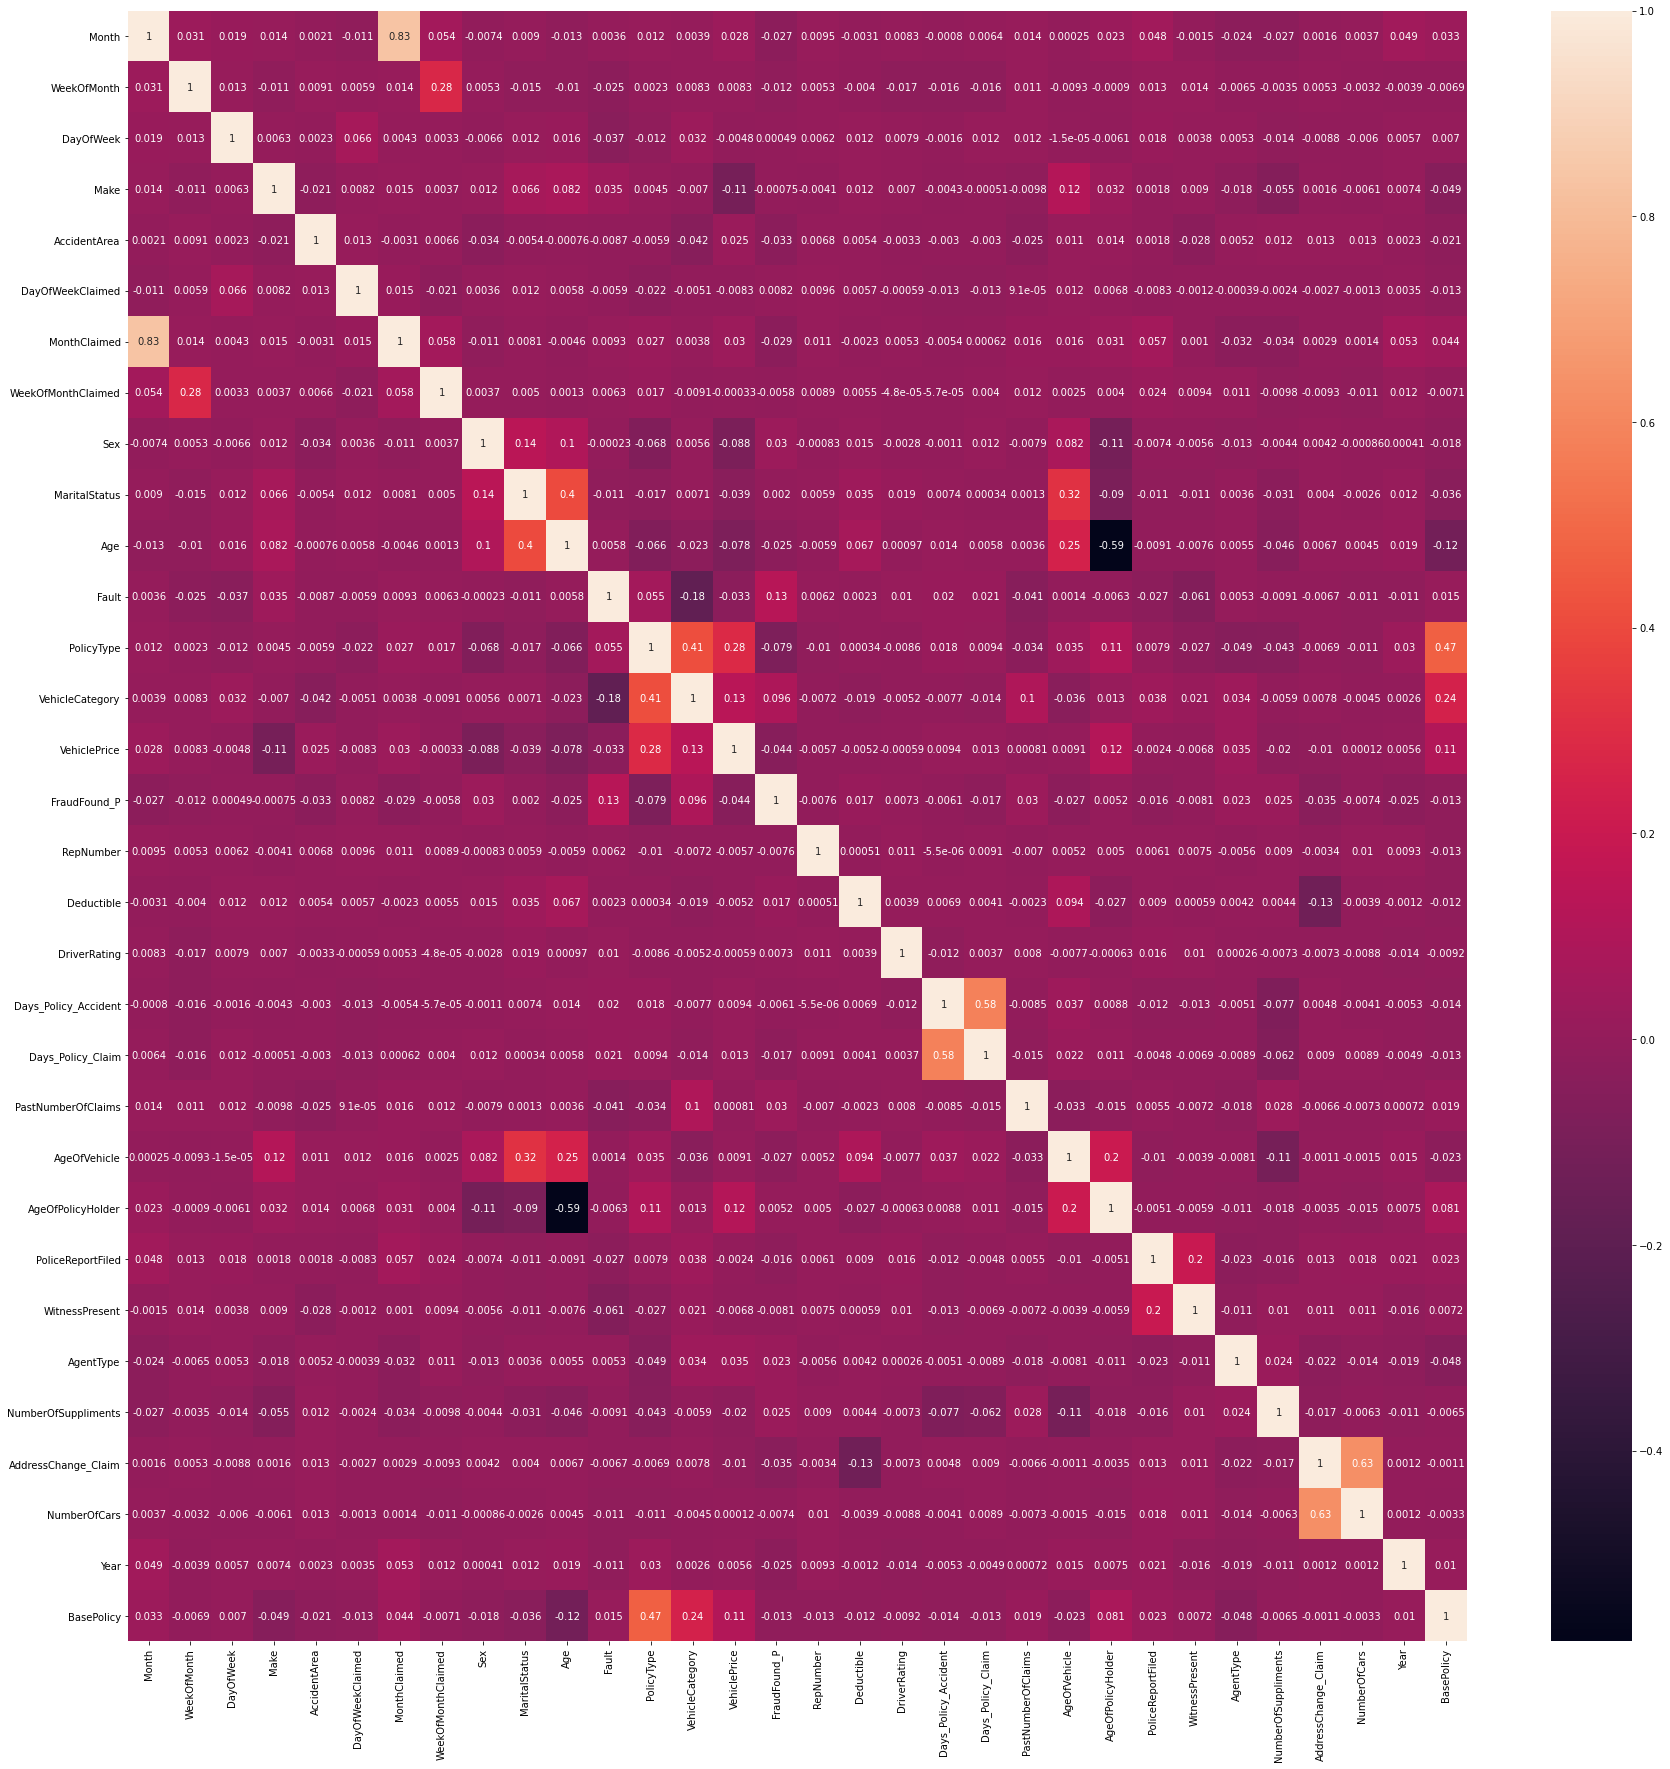

In [50]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,)

In [51]:
X = df.drop(['FraudFound_P'],axis=1).values
Y = df['FraudFound_P'].values

In [52]:

from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10 )

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestCentroid

sdtscaler = StandardScaler()

X_train = sdtscaler.fit_transform(X_train)
X_test = sdtscaler.transform(X_test)

Model = NearestCentroid()
Model.fit(X_train,Y_train)

NearestCentroid()

In [55]:
Y_hat = Model.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score
print(np.round(accuracy_score(Y_test,Y_hat)*100,0))

69.0


In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(Y_test, Y_hat))

              precision    recall  f1-score   support

           0       0.97      0.69      0.80      4338
           1       0.12      0.67      0.21       288

    accuracy                           0.69      4626
   macro avg       0.55      0.68      0.51      4626
weighted avg       0.92      0.69      0.77      4626



# Deployment of Model